# CME 193 - Lecture 2 - NumPy




# Running Python

At this point, you should have some way to run Python.  If you don't have Jupyter working yet, that's ok.  For this class, just open up an interactive python session to follow along.

For most of you, this means you can open up a terminal, and type
```bash
python
```
and an interactive session should start.  Again, you may wish to use `ipython`, which can be invoked from the terminal in the same way.  If you don't have `ipython`, but want it, just open up a terminal and type
```bash
pip install ipython
```
or, if you prefer
```bash
conda install ipython
```
You now have `ipython`.  Aren't package managers great?

## Scripts

Often, python is run using scripts.  These are just text files, often with a `.py` extension that contain python code.  You can find an example [here](https://github.com/icme/cme193/blob/gh-pages/nb/2019_winter/lecture_2/test_script.py).  If you download it to your computer, you can run it from a terminal
```bash
cd <script location>
python test_script.py
```
Note that this doesn't involve opening up Jupyter or an interactive python session.


# 80/20 Rule

The 80/20 rule ([Pareto Principle](https://en.wikipedia.org/wiki/Pareto_principle)) can be applied to programming. 
You don't need to know everything to be productive - for 80% of what you might want to do, you only need to know 20% of a language (yes, this is very heuristic).

Last time, we saw a small bit of Python syntax (20% might be generous), but it will allow us to do most of what we want to do.  (We'll pick up a bit more throughout the class, and maybe get to 20% by the end).

Today, we'll see a small bit of NumPy, but you'll see enough to implement a simple, but non-trivial, algortithm from linear algebra (power method).

Why does this work?  A lot of any language (not just programming) is just figuring out the rules, and using them in new (and hopefully interesting) ways.  Once you see the SVD in numpy, you'll be able to figure out how to do LU or QR without too much trouble.


# NumPy

* Fundamental package for scientific computing with Python
* N-dimensional array object
* Linear algebra, Fourier transform, random number capabilities
* Building block for other packages (e.g. Scipy, scikit-learn)
* Open source, huge dev community!

## Installation

If you installed Python with `anaconda`, you should already have NumPy installed. To test if you have numpy already, go to your terminal or command prompt and type:

```bash
python -c 'import numpy'
```
If this does nothing, congrats! You have numpy. 

If the output looks something like this:

```bash
Traceback (most recent call last):
  File "<string>", line 1, in <module>
ImportError: No module named numpy
```

Then you don't...

To install numpy, simply go to your terminal and type 

```bash
pip install numpy
```
or, if you prefer
```bash
conda install numpy
```

## Why numpy?

A very common question people ask is "why can't I just use lists for math?"

Here are a few reasons why not:

* Real vectors can be big!
* How to handle $n$ dimensions? If we have lists, there is no restriction. 
* How about very sparse data?
* *abstraction*! Something like $A = U\Sigma V^T$ is common enough that we want to encapsulate that.
* Speed

## A quick lesson on `import`ing in Python

There are 3 basic ways to import a package in Python.

* `from numpy import linspace`
* `import numpy as np`
* `import numpy`

Lets say you know that numpy has the function `linspace`. Here is how you access that function in each scenario:

* `linspace(...)`
* `np.linspace(...)`
* `numpy.linspace(...)`

In [1]:
# Time to get started The first thing to do is import numpy.
import numpy as np

In [ ]:
# basic array creation
A = np.array([[1, 2, 3], [4, 5, 6]]) 
print('A =\n', A)

Af = np.array([[1, 2, 3], [4, 5, 6]], float)
print('\nAf =\n', Af)

In [ ]:
# -- numpy provides many ways to create arrays subject to mathematical constraints
print('arange example =', np.arange(0, 1, 0.2))

print('\nlinspace example =', np.linspace(0, 2*np.pi, 4))

# -- a matrix of zeros
A = np.zeros((2,3))
print('\nzeros example =\n', A)

print('\nA.shape =', A.shape) ## a tuple!

In [ ]:
# -- numpy provides routines for random array creation
print(np.random.random((2,3)))

In [ ]:
# normal random variables with mean 1.0, and std deviation 2.0
a = np.random.normal(loc=1.0, scale=2.0, size=(2,2))
print(a)

In [ ]:
# save an array to a text file
np.savetxt("a_out.txt", a) # columns separated by spaces
b = np.loadtxt("a_out.txt")

In [ ]:
!ls

In [ ]:
!cat a_out.txt

In [ ]:
print('a = \n', a)
print('b = \n', b)

## reshaping an array

Note the total number of elements must agree.

In [ ]:
# reshape an array
a = np.linspace(0,10,100).reshape(10,10)
a

In [ ]:
a = np.linspace(0,10,100).reshape(10,-1)
a

In [ ]:
a.flatten()

## Indexing Arrays

You can index arrays using a Matlab-like syntax.  Recall that Python indexing starts at 0

`x[i,j]` returns value at $i$th row and $j$th column of $x$

**slicing**

`x[i,:]` returns entire $i$th row

`x[:,j]` returns entire $j$th column

In [ ]:
x = np.arange(9) # 0, 1, ... , 9
x = np.resize(x, (3,3))
print(x)
print(x[0,:])
print(x[:,0])
print(x[0,1:]) # indices 1 to last index
print(x[0,-2:]) # last 2 indices
print(x[1:3])
y = np.arange(10)
print(y)
print(y[0:10:2]) # start:stop:stride
print(y[::2]) # start:stop:stride

# Memory/Copying

Basic assignment is a "view" not a "copy"

In [ ]:
a = np.arange(10)
a

In [ ]:
b = a[::2]
b

In [ ]:
b[1] = 11
print(b)
print(a) # note that a was changed!

In [ ]:
# if you want to have an actual copy:
a = np.arange(10)
b = a[::2].copy() # use the copy() method
b[1] = 11
print(b)
print(a) # not changed!

# Math Operators, Vectorization

Vectorization refers to applying a function elementwise given array inputs.  Think Matlab's "dot" notation

In [ ]:
a = np.arange(4)
print('a = ', a)
b = np.array([2, 3, 2, 4])
print('b = ', b)
print('a * b = ', a * b)
print('b - a = ', b - a)  

In [ ]:
x = np.arange(4)
print(x)
y = np.square(x)
print(y)

In [ ]:
# you can also vectorize functions that are not already vectorized
# note that some functions may automatically vectorize
def f(x):
    y = x*x
    return y + 2

x = np.arange(4)
print(x)
vf = np.vectorize(f)
print(vf(x))

# Array Broadcasting

When operating on two arrays, numpy compares shapes. Two dimensions are compatible when:

* They are of equal size
* One of them is 1


In [ ]:
a = np.array([0, 10, 20, 30])
print(a)
a+10

In [ ]:
a = np.array([[0, 10], [20, 30]])
print(a)
a + np.array([3,5])

In [ ]:
a = np.array([0, 10, 20, 30]).reshape(4,1)
print("a shape: ", a.shape)
b = np.array([0, 1, 2]).reshape(1,3)
print("b shape: ", b.shape)
a + b

# Plotting with PyPlot

PyPlot is part of the `matplotlib` package.  Again, if you don't have it, open up a terminal, and
```bash
conda install matplotlib
```

PyPlot is a popular plotting library (especially in conjunction with NumPy), and easy to use.

Today, we'll just see some basics.  If you want to see some pretty pictures for inspiration, check out the [matplotlib gallery](https://matplotlib.org/gallery.html)

In [2]:
import matplotlib.pyplot as plt

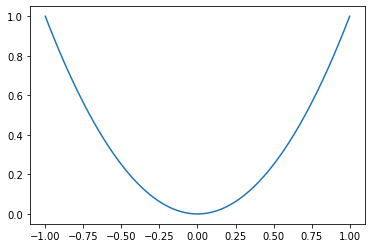

In [3]:
x = np.linspace(-1,1,100)
y = x**2

plt.plot(x, y)

plt.show() # if run from terminal, should pop open a window.

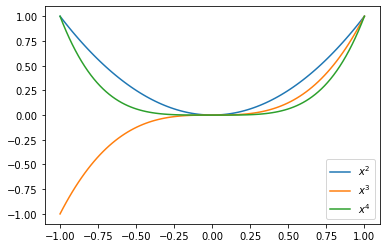

In [4]:
x = np.linspace(-1,1,100)
x2 = x**2
x3 = x**3
x4 = x**4
plt.plot(x, x2)
plt.plot(x, x3)
plt.plot(x, x4)
plt.legend(["$x^2$", "$x^3$", "$x^4$"])
plt.show() # if run from terminal, should pop open a window.

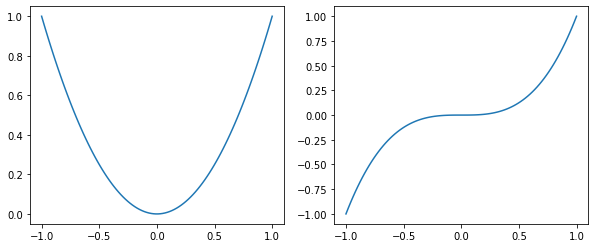

In [6]:
f,ax= plt.subplots(1,2, figsize=(10,4))

ax[0].plot(x,x2)
ax[1].plot(x,x3)

You can do all sorts of formatting:

Text(0.5, 1.0, 'plot title, including $f_i$')

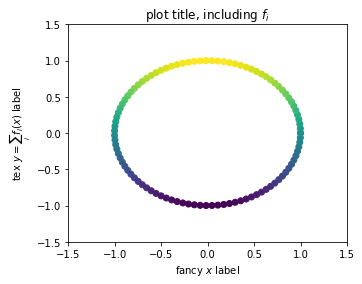

In [9]:
theta = np.linspace(0,2*np.pi,100)
x = np.cos(theta)
y = np.sin(theta)

plt.figure(figsize=(5,4))
plt.scatter(x, y, c=y) # color by y value

plt.xlim((-1.5, 1.5))
plt.ylim((-1.5, 1.5))

plt.xlabel('fancy $x$ label')
plt.ylabel('tex $y = \sum_i f_{i}(x)$ label')

plt.title('plot title, including $f_i$')

# plt.savefig('color_circle.png')

# plt.show()

# Exercise 1

(5-10 min)

**Numpy/Pyplot**
1. Choose your favorite function $f:x \to \mathbb{R}$.
    1. find the numpy version of your function, or write your own vectorized version
    2. plot your function on a reasonable domain.
    
2. Add some Gaussian random noise to points on a circle, and generate a scatter plot.

(-1, 1)

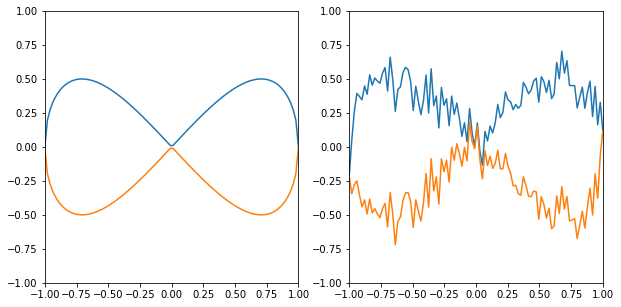

In [35]:
# Lemniscate of Gerono
x = np.linspace(-1, 1, 100)
a = 1
y_positive = np.sqrt(x**2 - (x**4 / a**2))
y_negative = -np.sqrt(x**2 - (x**4 / a**2))

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax[0].plot(x, y_positive, x, y_negative)
ax[0].set_xlim(-1, 1)
ax[0].set_ylim(-1, 1)

noise = np.random.normal(0, 0.1, y_positive.shape)
y_positive_noise = y_positive + noise
y_negative_noise = y_negative + noise
ax[1].plot(x, y_positive_noise, x, y_negative_noise)
ax[1].set_xlim(-1, 1)
ax[1].set_ylim(-1, 1)

# Linear Algebra in NumPy

We'll start with 
```python
import numpy.linalg as la
```
`numpy` is the *package*.  `linalg` is a *module* in the package.

In [ ]:
import numpy.linalg as la

You can find a full list of available operations/decompositions in [the documentation](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.linalg.html)

* `la.eye(3)`, Identity matrix
* `la.trace(A)`, Trace
* `la.column_stack((A,B))`, Stack column wise
* `la.row_stack((A,B,A))`, Stack row wise
* `la.qr`, Computes the QR decomposition
* `la.cholesky`, Computes the Cholesky decomposition
* `la.inv(A)`, Inverse
* `la.solve(A,b)`, Solves $Ax = b$ for $A$ full rank
* `la.lstsq(A,b)`, Solves $\arg\min_x \|Ax-b\|_2$
* `la.eig(A)`, Eigenvalue decomposition
* `la.eigh(A)`, Eigenvalue decomposition for
symmetric or hermitian
* `la.eigvals(A)`, Computes eigenvalues.
* `la.svd(A, full)`, Singular value decomposition
* `la.pinv(A)`, Computes pseudo-inverse of A

In [37]:
# example of SVD
A = np.random.normal(0, 1, (2,3))
U, S, V = np.linalg.svd(A)
print("A  = \n", A)
print("U = \n", U)
print("S = \n", S)
print("V = \n", V)

A  = 
 [[-1.1707166  -0.34065983 -0.50071136]
 [-0.23193123  1.01845106 -0.99450162]]
U = 
 [[ 0.55864641  0.82940593]
 [ 0.82940593 -0.55864641]]
S = 
 [1.53774805 1.20529558]
V = 
 [[-0.55040341  0.42555798 -0.71830112]
 [-0.69811236 -0.70646514  0.11638788]
 [-0.45792491  0.56551517  0.68592811]]


In [39]:
A = np.arange(0, 4, 1.0).reshape(2,2)
print("A = \n",A)
x = np.array([1,2], float)
print("x = \n", x)
b = A.dot(x) # Matrix-vector multiplication
print("b = \n", b)
# x2 <- A \ b
x2 = np.linalg.solve(A,b)
print("x2 = \n", x2)

A = 
 [[0. 1.]
 [2. 3.]]
x = 
 [1. 2.]
b = 
 [2. 8.]
x2 = 
 [1. 2.]


$0*x_1 + 1*x_2 = 2$

$2*x_1 + 3*x_2 = 8$

==> $x_2 = 2, x_1 = 1$

Yes.  Matrix vector multiplication really is done using `A.dot(x)`

It may look funny, but is mathematically correct.  What you are doing is taking inner products between each row of `A` and the vector `x`.

In [ ]:
# Transpose
print("A = \n",A)
print("A^T = \n",A.T)

# Random Numbers

In [ ]:
import numpy.random as rng # another module of numpy

Again, if you're looking for something in particular, see [the documentation](https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html)

* `rng.rand(d0,d1,...,dn)`, Random values in a given shape
* `rng.randn(d0, d1, ...,dn)`, Random standard normal
* `rng.randint(lo, hi, size)`, Random integers `[lo, hi)`
* `rng.choice(a, size, repl, p)`, Sample from a
* `rng.shuffle(a)`, Permutation (in-place)
* `rng.permutation(a)`, Permutation (new array)
* Also, have parameterized distributions: `beta`, `binomial`, `chisquare`, `exponential`, `dirichlet`, `gamma`, `laplace`, `lognormal`, `pareto`, `poisson`, `power`...

To plot histograms, using Pyplot:

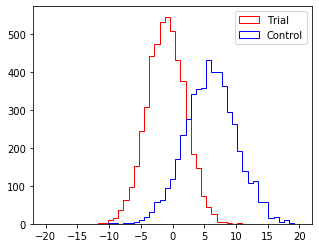

In [40]:
f, ax = plt.subplots(1, 1, figsize=(5,4))

bins = np.linspace(-20, 20, 50) # 50 bins between -20 and 20 

# data
x1 = np.random.normal(-1, 3, 5000) 
x2 = np.random.normal(6, 4, 5000)

# add histograms to plots
plt.hist(x1, bins = bins, color='red', label = 'Trial', histtype='step')
plt.hist(x2, bins = bins, color='blue', label = 'Control', histtype='step')

plt.legend()
plt.show()

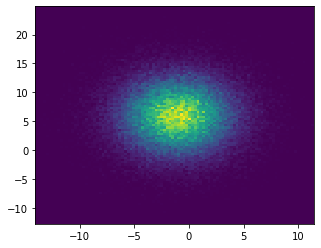

In [41]:
# example of a 2D histogram
f, ax = plt.subplots(1, 1, figsize=(5,4))
plt.hist2d(np.random.normal(-1, 3, 100000), np.random.normal(6, 4, 100000), bins=100)
plt.show()

# Exercise 2

1. Choose a your favorite univariate probability distribution (aside from a normal distribution)
    1. See if it is in `numpy.random` [here](https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html#distributions)
    2. plot a histogram of your distribution with 10,000 samples
    3. Overlay a histogram of your second favorite distribution onto the same plot.
    
2. Matrix-Matrix multiplication.  Form your favorite $2\times 2$ matrix - we'll call it $A$.  What is the result of:
    1. `A*A`
    2. `A.dot(A)`

Can you explain why?
3. **Power method**

Power method is an algorithm for finding the largest eigenpair of a matrix.  We'll assume that we're working with symmetric/hermitian matrices for simplicity.  Recall the largest eigenvector of a matrix $A$ solves the variational problem:
$$\max_{\|v\|_2 = 1} v^T A v$$
The eigenvalue is the value $\lambda = v^T A v$.
* generate a random symmetric matrix (however you like).
* Find the largest eigenpair using `numpy.linalg.eigh`

The power method uses iterated matrix-vector multiplication to find the largest eigenvalue of $A$.  
```
input: A - n x n symmetric matrix
output: v, lam - vector of length n and eigenvalue

v = random vector of length n
v = v/||v||_2
while not converged:
    v = A*v
    v = v/||v||_2
    
lam = v^T A v
```

turn the above pseudo-code into a python function that implements power method. How does the result compare to `eigh`?

**Hints** 
* You may find the following function useful: `numpy.linalg.norm` [docs](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.norm.html)
* $v^T A v$ can be computed using the `dot` method
* track convergence using the convergence of the rayleigh quotient $r = v^T A v$.  Say you've converged when $r$ changes by at most $10^{-8}$

**Bonus**
Plot convergence of the rayleigh quotient using `plt.semilogy` [docs](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.semilogy.html)

In [81]:
# generate a random symmetric matrix (however you like).
# Find the largest eigenpair using numpy.linalg.eigh

symmetric_M = np.arange(5*5).reshape((5, 5))
print(symmetric_M)
for i in range(symmetric_M.shape[0]):
    for j in range(i, symmetric_M.shape[1]):
        symmetric_M[i, j] = symmetric_M[j, i]
print(symmetric_M)

eigenvalues, eigenvectors = np.linalg.eigh(symmetric_M)
print('All eigenvalues: {}'.format(eigenvalues))

largest_i = np.argmax(eigenvalues)
print('Largest eigenvalue is {}, with corresponding eigenvector {}'.format(eigenvalues[largest_i], eigenvectors[largest_i]))

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
[[ 0  5 10 15 20]
 [ 5  6 11 16 21]
 [10 11 12 17 22]
 [15 16 17 18 23]
 [20 21 22 23 24]]
All eigenvalues: [-15.41730621  -2.97513341  -1.55469259  -1.10724576  81.05437797]
Largest eigenvalue is 81.0543779702994, with corresponding eigenvector [-0.52648358  0.47111317  0.33007653  0.18004701 -0.59958317]


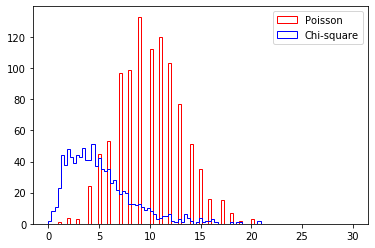

In [65]:
bins = np.linspace(0, 30, 100)
d1 = np.random.poisson(10, size = 1000)
d2 = np.random.chisquare(5, size = 1000)

plt.hist(d1, bins = bins, label = 'Poisson', histtype = 'step', color = 'r')
plt.hist(d2, bins = bins, label = 'Chi-square', histtype = 'step', color = 'b')
plt.legend()

In [70]:
A = np.arange(4).reshape((2, 2))
print(A)

print(A * A)
print(np.dot(A, A))

[[0 1]
 [2 3]]
[[0 1]
 [4 9]]
[[ 2  3]
 [ 6 11]]


In [113]:
def power_method(A):
    
    def get_magnitude(arr):
        return np.sqrt(np.sum(arr**2))
    
    def get_rayleigh(v, M):
        return v.T.dot(M).dot(v)
    
    v = np.arange(A.shape[0])
    v = v / get_magnitude(v)
    all_r, r, prev_r = [], float('inf'), 0
    
    while abs(prev_r - r) > 10**-8:
        v = A.dot(v)
        v = v / get_magnitude(v)
        r, prev_r = get_rayleigh(v, A), r
        all_r.append(r)
       
    return v, r, all_r

power_method(symmetric_M)

(array([0.31258059, 0.35485983, 0.41465135, 0.49490577, 0.59958354]),
 81.05437797025303,
 [80.48520849539165,
  81.03368371325686,
  81.05362912581623,
  81.05435087721315,
  81.05437699008155,
  81.05437793483553,
  81.05437796901637,
  81.05437797025303])

In [ ]:
# possible solution to power method
import numpy as np
import matplotlib.pyplot as plt

# generate random matrix
n = 100
A = np.random.normal(0, 1, (n,n))
# make a symmetric matrix
A = A.dot(A.T) # A <- A*A^T

print("Using eigh")
lam, V = np.linalg.eigh(A)
print("largest eigenvalue: ", lam[-1:][0])
#print("associated eigenvector:\n", V[:,-1:])
print("\n")

# rayleigh quotient
# returns v^T*Av
def rq(v, A):
    return v.dot(A.dot(v))

# compute power method
# tol is a key-word argument for convergence tolerance
def power_method(A, tol=1e-8):
    n = A.shape[1]
    # generate random vector with unit length
    v = np.random.normal(0, 1, n)
    v /= np.linalg.norm(v)
    
    rqs = [] # keep track of rayleigh quotients as we progress
    rqs.append(rq(v, A))
    converged = False
    
    while True:
        
        # v <- A*v
        v = A.dot(v)
        # normalize v
        v /= np.linalg.norm(v)
        
        rqs.append(rq(v,A))
        # check if rayleigh quotient has converged
        if np.abs(rqs[-1] - rqs[-2]) < tol:
            break
    
    # set eigenvalue
    lam = rqs[-1]
    
    return v, lam, rqs

print("using power method")
v_power, lam_power, rqs = power_method(A, tol=1e-12)
print("largest eigenvalue: ", lam_power)
#print("associated eigenvector:\n", v_power)
print("converged in %d iterations" % len(rqs))
print("\n")

# error in eigenvector - take into account sign ambiguity
err = np.minimum(np.linalg.norm(V[:,-1] - v_power), np.linalg.norm(V[:,-1] + v_power))
print("error in eigenvector = ", err)

In [ ]:
# make numpy array
# that tracks convergence of Rayleigh quotient to final value
rq_error = np.array(rqs[:-1])
rq_error -= lam_power
rq_error = np.abs(rq_error)


f, ax = plt.subplots(1, 1, figsize=(10,8))

ax.semilogy(rq_error)
ax.set_xlabel('iteration')
ax.set_ylabel(r'|$\lambda$ - $R_q$|')
ax.set_title("Convergence of Rayleigh Quotient")

plt.show()